In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image
import sklearn 


In [194]:
reads = pd.read_csv("books.csv")

# Data Overview

In [195]:
reads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.780000e+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.780000e+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.780000e+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.780000e+12,eng,435,2149872,33964,NaN


In [196]:
reads.shape

(13716, 11)

### Columns Description:
<b>bookID</b> Contains the unique ID for each book/series.
 
<b>title</b> contains the titles of the books.

<b>authors</b> contains the author of the particular book.

<b>average_rating</b> the average rating of the books, as decided by the users.

<b>ISBN ISBN(10)</b> number, tells the information about a book - such as edition and publisher.

<b>ISBN 13</b> The new format for ISBN, implemented in 2007. 13 digits.

<b>language_code</b> Tells the language for the books.

<b>Num_pages</b> Contains the number of pages for the book.

<b>Ratings_count</b> Contains the number of ratings given for the book.

<b>text_reviews_count</b> Has the count of reviews left by users.


In [197]:
reads.dtypes
#already we can see that we will need to convert a few coulmns 

bookID                  int64
title                  object
authors                object
average_rating         object
isbn                   object
isbn13                float64
language_code          object
# num_pages            object
ratings_count           int64
text_reviews_count      int64
Unnamed: 10           float64
dtype: object

In [198]:
reads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13716 non-null  int64  
 1   title               13716 non-null  object 
 2   authors             13716 non-null  object 
 3   average_rating      13716 non-null  object 
 4   isbn                13716 non-null  object 
 5   isbn13              13716 non-null  float64
 6   language_code       13716 non-null  object 
 7   # num_pages         13716 non-null  object 
 8   ratings_count       13716 non-null  int64  
 9   text_reviews_count  13716 non-null  int64  
 10  Unnamed: 10         1 non-null      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.2+ MB


In [199]:
#cheacking if there are any duplicates in our data
reads.duplicated().any()

False

In [200]:
#checking how many nulls we have in our data
reads.isnull().sum(axis=0)

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
# num_pages               0
ratings_count             0
text_reviews_count        0
Unnamed: 10           13715
dtype: int64

# Data Cleaning

In [201]:
#investigating why there is 1 non-null on column "Unnamed: 10"
reads[reads['Unnamed: 10'].notnull()]


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
5686,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.6,1.593600e+09,9.78E+12,eng,400,25,4.0


In [202]:
# we can spare droping the troubling row
reads =reads.drop(reads.index[5686])

In [203]:
# fixing the duplicate in J.K Rowling that we spotted on the head of the data
reads.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [204]:
reads['language_code'].unique()
#making sure there would be no confusioun with the bookID while applaying the machine learning

array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por',
       'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat',
       'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb',
       'nor', 'gla', 'ale'], dtype=object)

In [205]:
reads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,439785960,9.780000e+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780000e+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,439554934,9.780000e+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.780000e+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9.780000e+12,eng,435,2149872,33964,NaN


# Data Adjusting

In [206]:

#Dropping irrelevant columns to the project ( including title and authors so not to confuse the model)

# else could have done to transform 
#le = preprocessing.LabelEncoder()
#reads['title'] = le.fit_transform(reads['title'])


reads = reads.drop(columns=['title','authors','Unnamed: 10','isbn', 'isbn13','bookID'])


In [207]:
reads.head()

,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,4.56,eng,652,1944099,26249
1,4.49,eng,870,1996446,27613
2,4.47,eng,320,5629932,70390
3,4.41,eng,352,6267,272
4,4.55,eng,435,2149872,33964


In [208]:
le = preprocessing.LabelEncoder()
reads['language_code'] = le.fit_transform(reads['language_code'])

# to transform back
# reads['language_code']=le.inverse_transform(reads['language_code'])
reads = pd.get_dummies(reads, columns=['language_code'])


In [209]:
# Casting Obj to Int, float for rounding 
reads['# num_pages']=reads['# num_pages'].astype(int)
reads['average_rating']=reads['average_rating'].astype(float)
#reads['average_rating']=pd.to_numeric(reads['average_rating'],errors='coerce')


In [210]:
#rounding the average rating, and casting from float to int
reads['average_rating'] = reads['average_rating'].round()
reads['average_rating']=reads['average_rating'].astype(int)
#reads['average_rating']=reads['average_rating'].astype()


In [211]:
rating_categoris =list(reads['average_rating'].unique())
print ("rating_categoris: ",rating_categoris)

rating_categoris:  [5, 4, 3, 0, 2, 1]


In [212]:
#number of instances per rating category 
reads['average_rating'].value_counts()

4    12544
3      872
5      243
0       34
2       20
1        2
Name: average_rating, dtype: int64

# Machine Learning Model


In [213]:
y= reads['average_rating']
X= reads.drop(['average_rating'],axis = 1)

In [214]:
# y = Label(output) = average_rating
# X = features(input) = language_codes, num_pages, ratings_count, text_reviews_count.  
# also seeding the split in order to track the model 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10972, 33) (10972,)
(2743, 33) (2743,)


# K-nearest neighbors
The general idea behind K-nearest neighbors (KNN) is that data points are considered to belong to the class with which it shares the most number of common points in terms of its distance. K number of nearest points around the data point to be predicted are taken into consideration.

In [215]:
#importing the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

# importing metric model to check the accuracy
from sklearn import metrics
#running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.911410864017499

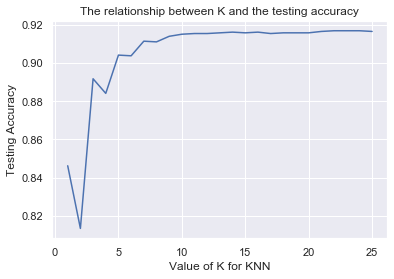

In [216]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('The relationship between K and the testing accuracy')
scores[7]

In [217]:
# i choose k=7 based on the Accuracy score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [218]:
results = confusion_matrix(y_test, y_pred)

print ('Accuracy Score :',metrics.accuracy_score(y_test, y_pred))

print ('\nConfusion Matrix :\n',results)

print ('\nReport :\n',metrics.classification_report(y_test, y_pred))

Accuracy Score : 0.911410864017499

Confusion Matrix :
 [[   0    0    0    0   11    0]
 [   0    0    0    1    0    0]
 [   1    0    0    0    1    0]
 [   0    0    0    2  162    1]
 [   2    0    0   15 2498    0]
 [   0    0    0    1   48    0]]

Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.11      0.01      0.02       165
           4       0.92      0.99      0.95      2515
           5       0.00      0.00      0.00        49

    accuracy                           0.91      2743
   macro avg       0.17      0.17      0.16      2743
weighted avg       0.85      0.91      0.88      2743



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### The Problem
 i have encountered a problem in the model which is that it dosent sample all classes in the same amount for the testing 
 and therefor not able to predict them - the model is biased.


i will try and rise the testing group to 30% 
in order to get more classes in the testing group.


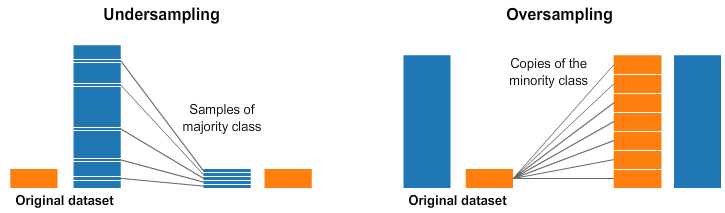

In [219]:
Image("resampling.png")

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=420)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9600, 33) (9600,)
(4115, 33) (4115,)


Text(0.5, 1.0, 'The New relationship between K and the testing accuracy- 30% testing')

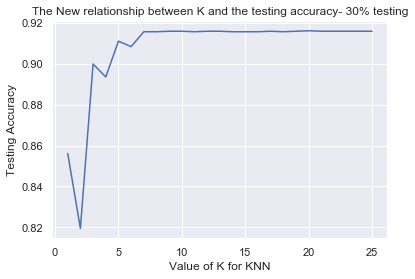

In [221]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('The New relationship between K and the testing accuracy- 30% testing')    

In [222]:
# i choose k=7 based on the Accuracy score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

results2 = confusion_matrix(y_test, y_pred)

print ('Accuracy Score :\n',metrics.accuracy_score(y_test, y_pred))

print ('Confusion Matrix :\n',results2)

print ('Report :\n',metrics.classification_report(y_test, y_pred))

Accuracy Score :
 0.9156743620899149
Confusion Matrix :
 [[   1    0    0    0   13    0]
 [   0    0    0    0    1    0]
 [   0    0    0    0    4    0]
 [   0    0    0    5  258    0]
 [   0    0    0    7 3762    0]
 [   0    0    0    1   63    0]]
Report :
               precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.38      0.02      0.04       263
           4       0.92      1.00      0.96      3769
           5       0.00      0.00      0.00        64

    accuracy                           0.92      4115
   macro avg       0.38      0.18      0.19      4115
weighted avg       0.87      0.92      0.88      4115



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


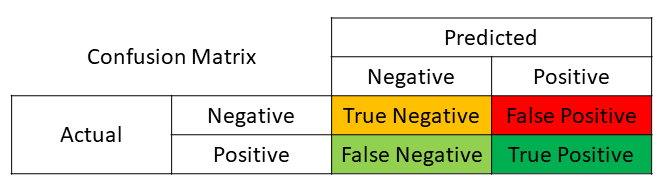

In [223]:
# Confusion Matrix Index reminder
from IPython.display import Image
Image("confusion matrix.png")

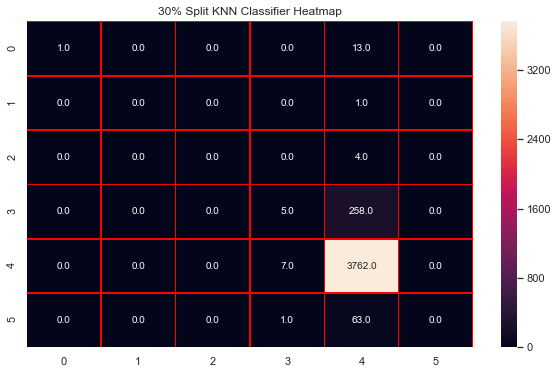

In [224]:
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(results2,annot=True,linewidth=0.5,linecolor="red",fmt=".1f",ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.51)
ax.set_title('30% Split KNN Classifier Heatmap')

plt.show()

## Random Forest
### reasons to use Random Forest method:
*It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

*The algorithm can be used in both classification and regression problems.

*You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=666)

In [226]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred))

results3 = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :\n',results3)

print ('Report :\n',metrics.classification_report(y_test, y_pred))

Accuracy Random Forest: 0.907765220561429
Confusion Matrix :
 [[   6    0    2    1    5    1]
 [   0    0    0    0    2    0]
 [   0    0    0    0    8    0]
 [   0    0    1   11  341    2]
 [   0    0    2   35 4955   15]
 [   0    0    0    2   89    8]]
Report :
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.22      0.03      0.05       355
           4       0.92      0.99      0.95      5007
           5       0.31      0.08      0.13        99

    accuracy                           0.91      5486
   macro avg       0.41      0.25      0.28      5486
weighted avg       0.86      0.91      0.88      5486



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


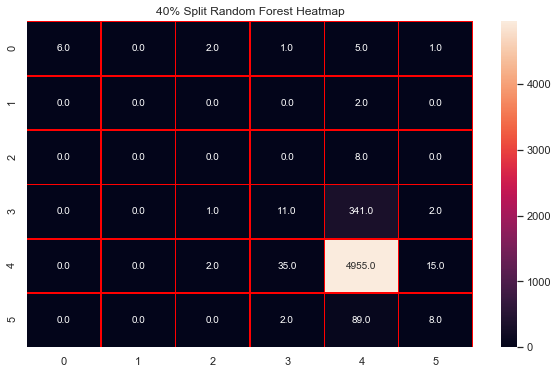

In [227]:
# from the Random Forest

f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(results3,annot=True,linewidth=0.5,linecolor="red",fmt=".1f",ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.51)
ax.set_title('40% Split Random Forest Heatmap')

plt.show()

## Up-Sampling the minority classes as a solution 
#### "Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal."
#### with help from [elite data science website](https://elitedatascience.com/imbalanced-classes)


In [228]:
# current calsses value count
reads['average_rating'].value_counts()

4    12544
3      872
5      243
0       34
2       20
1        2
Name: average_rating, dtype: int64

In [229]:
class0=reads[reads['average_rating']==0]
class1=reads[reads['average_rating']==1]
class2=reads[reads['average_rating']==2]
class3=reads[reads['average_rating']==3]
class4=reads[reads['average_rating']==4]
class5=reads[reads['average_rating']==5]

In [230]:
from sklearn.utils import resample
# up sampeling to 4000 resamples for minority classes 

df_minority_upsampled0 = resample(class0, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled1 = resample(class1, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled2 = resample(class2, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled3 = resample(class3, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled5 = resample(class5, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([class4, df_minority_upsampled0, df_minority_upsampled1, df_minority_upsampled2, df_minority_upsampled3
                         , df_minority_upsampled5])
 

In [231]:
df_upsampled['average_rating'].value_counts()

4    12544
5     4000
3     4000
2     4000
1     4000
0     4000
Name: average_rating, dtype: int64

## KNN after re-sampling

In [232]:
y= df_upsampled['average_rating']
X= df_upsampled.drop(['average_rating'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1995)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(22780, 33) (22780,)
(9764, 33) (9764,)


In [233]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.8867267513314215

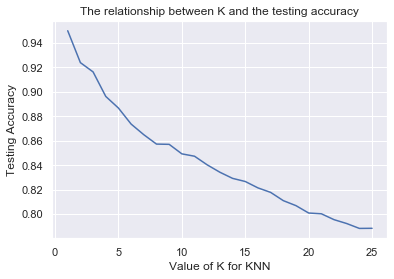

In [234]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('The relationship between K and the testing accuracy')
scores[5]

In [235]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

results4 = confusion_matrix(y_test, y_pred)

print ('Accuracy Score :',metrics.accuracy_score(y_test, y_pred))

print ('\nConfusion Matrix :\n',results4)

print ('\nReport :\n',metrics.classification_report(y_test, y_pred))

Accuracy Score : 0.8867267513314215

Confusion Matrix :
 [[1167    0    0    0    0    0]
 [   0 1231    0    0    0    0]
 [   0    0 1176    0    0    0]
 [   3    0    2  908  319   13]
 [  14    3    7  562 2969  180]
 [   3    0    0    0    0 1207]]

Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1167
           1       1.00      1.00      1.00      1231
           2       0.99      1.00      1.00      1176
           3       0.62      0.73      0.67      1245
           4       0.90      0.79      0.85      3735
           5       0.86      1.00      0.92      1210

    accuracy                           0.89      9764
   macro avg       0.89      0.92      0.90      9764
weighted avg       0.89      0.89      0.89      9764



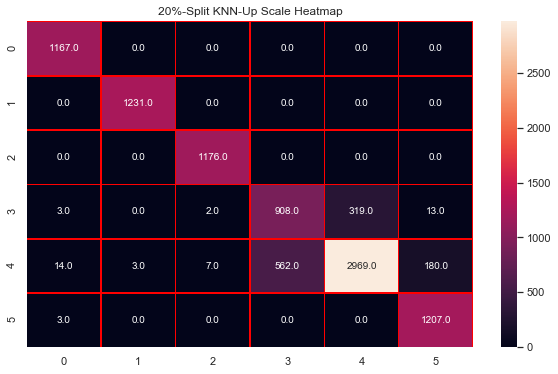

In [236]:
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(results4,annot=True,linewidth=0.5,linecolor="red",fmt=".1f",ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.51)
ax.set_title('20%-Split KNN-Up Scale Heatmap')

plt.show()